In [27]:
!git clone https://github.com/ZhenyaSonic/LearningMachine/branches

Cloning into 'branches'...
fatal: unable to access 'https://github.com/ZhenyaSonic/LearningMachine/branches/': The requested URL returned error: 410


In [25]:
# Шаг 1: Загрузка данных и вывод информации о наборе данных
import pandas as pd
from google.colab import files

# Загрузка данных
uploaded_files = files.upload()

# Преобразование данных в DataFrame
data = pd.read_csv(next(iter(uploaded_files)))

# Вывод головы таблицы
print(data.head())

# Вывод информации о наборе данных
print(data.info())

Saving 3_home_data.csv to 3_home_data (6).csv
   bedrooms_area  bathrooms_area  living_area  above_area  basement_area  \
0              3            1.00          110         110              0   
1              3            2.25          239         202             37   
2              2            1.00           72          72              0   
3              4            3.00          182          98             85   
4              3            2.00          156         156              0   

    price  
0  221900  
1  538000  
2  180000  
3  604000  
4  510000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms_area   21613 non-null  int64  
 1   bathrooms_area  21613 non-null  float64
 2   living_area     21613 non-null  int64  
 3   above_area      21613 non-null  int64  
 4   basement_area   21613 non-null  int64  
 5

Пропущенные значения в столбцах:
bedrooms_area     0
bathrooms_area    0
living_area       0
above_area        0
basement_area     0
price             0
dtype: int64


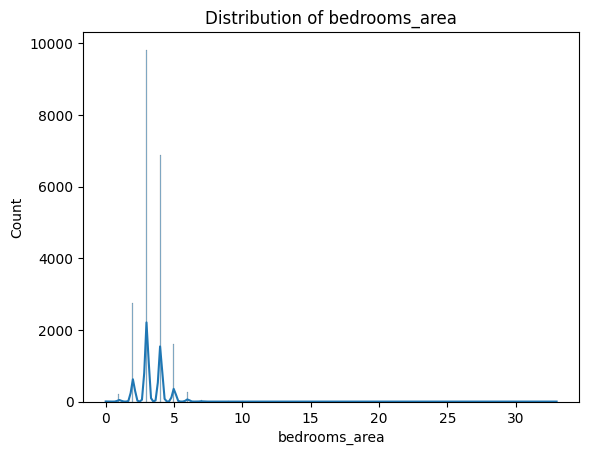

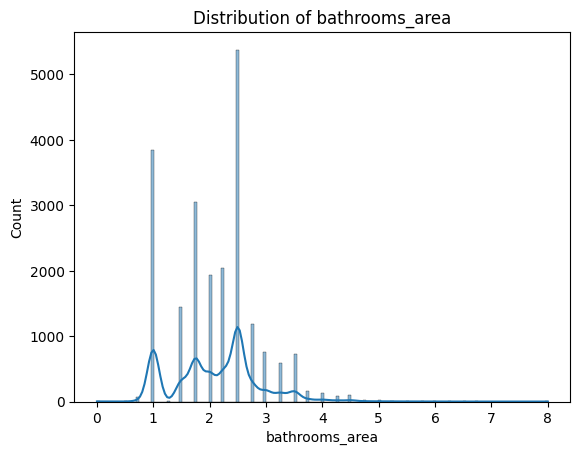

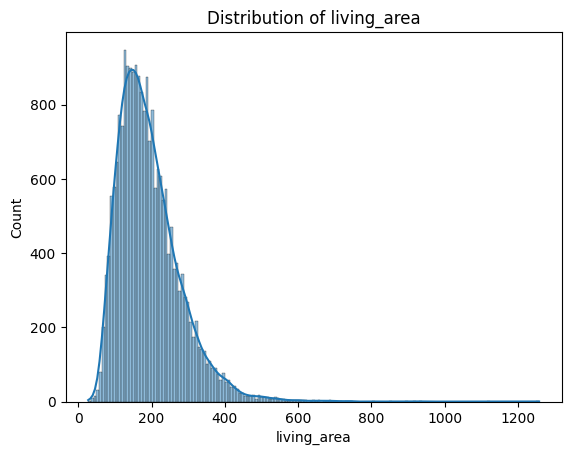

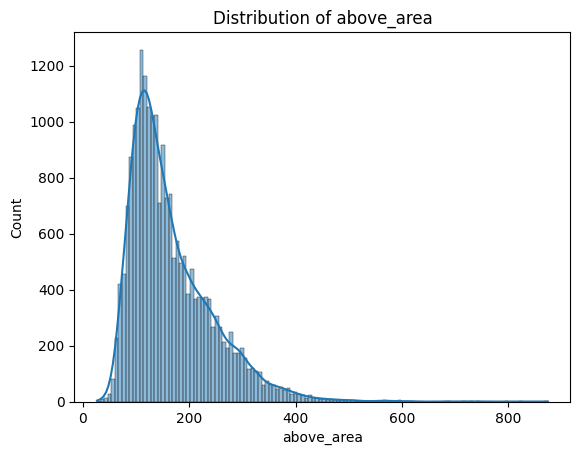

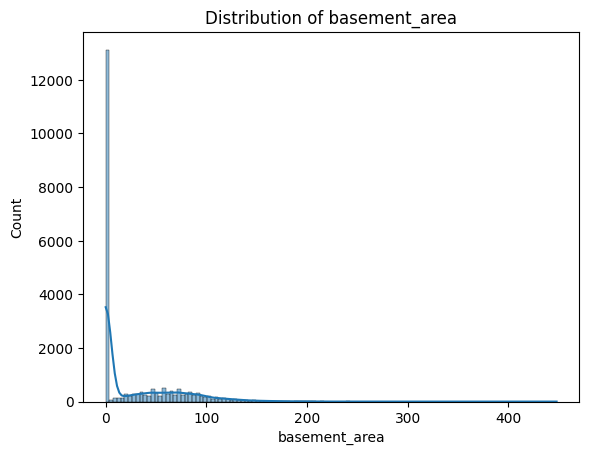

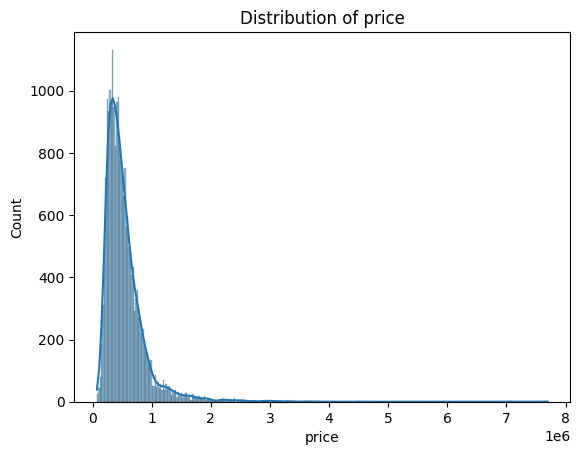

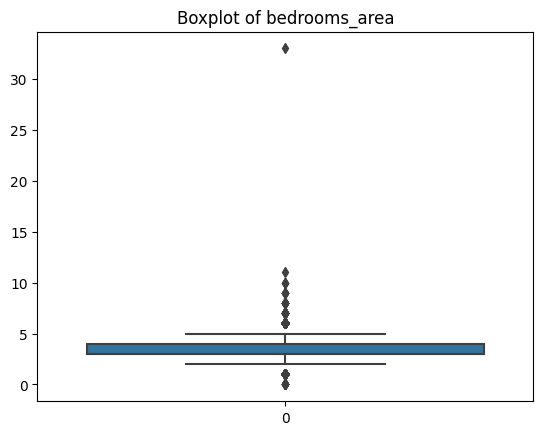

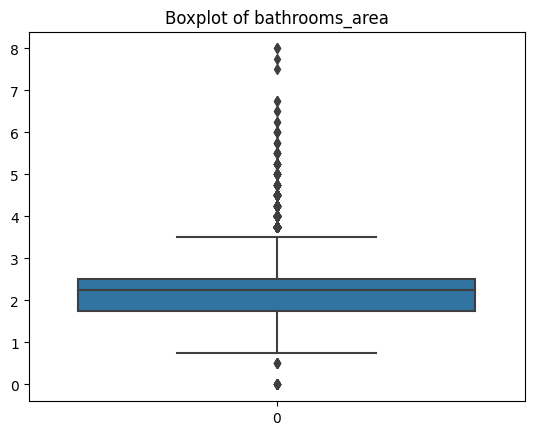

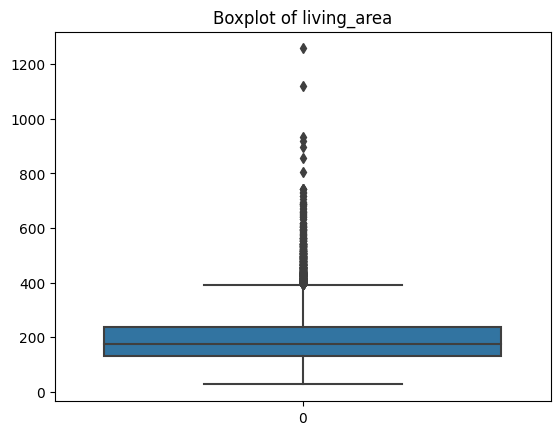

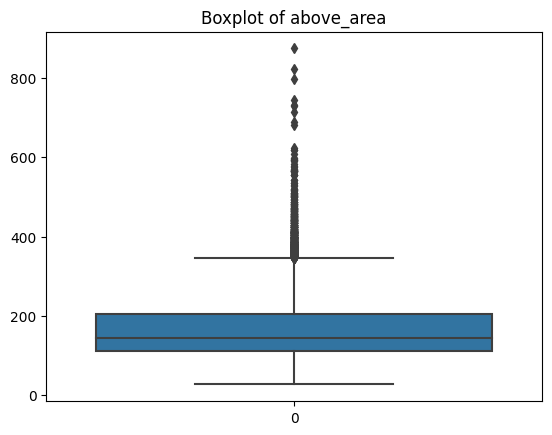

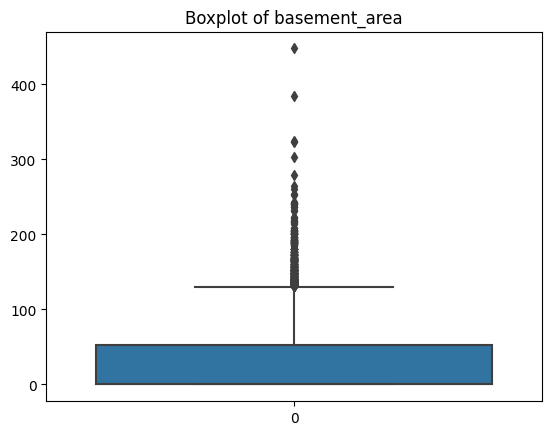

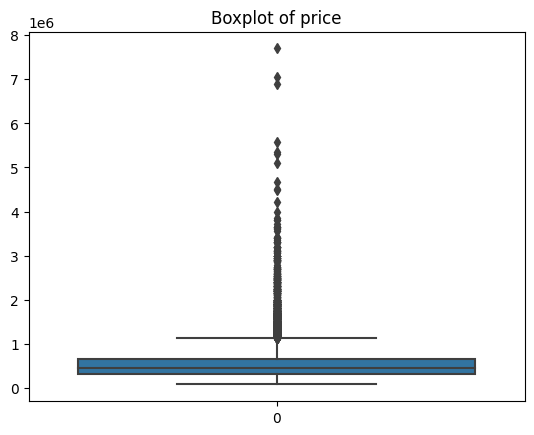

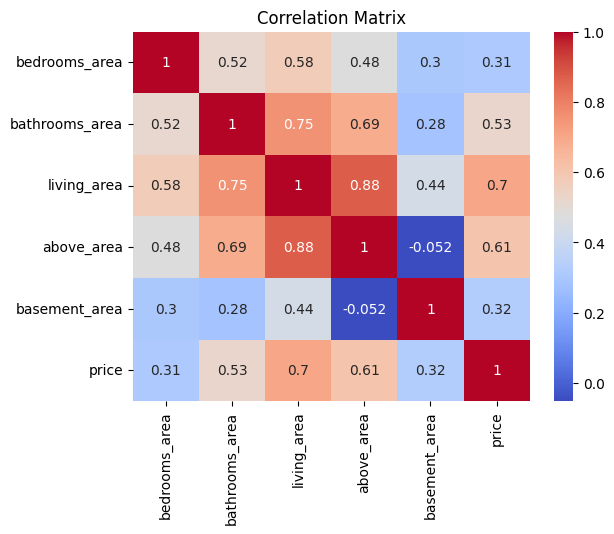

In [ ]:
# Шаг 2: Подготовка набора данных для анализа
# а) Перемешиваем набор данных
data = data.sample(frac=1).reset_index(drop=True)

# б) Проверяем наличие пропущенных значений и обрабатываем их
missing_values = data.isnull().sum()
print("Пропущенные значения в столбцах:")
print(missing_values)

# в) Анализируем распределение числовых переменных и порядковых категориальных признаков
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Графики распределения числовых переменных
import seaborn as sns
import matplotlib.pyplot as plt
for column in numeric_columns:
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Графики распределения порядковых категориальных признаков
for column in categorical_columns:
    sns.countplot(data[column])
    plt.title(f'Count of {column}')
    plt.show()

# г) Поиск выбросов и аномальных значений
# Для числовых переменных можно использовать boxplot, для категориальных - countplot
for column in numeric_columns:
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

for column in categorical_columns:
    sns.countplot(data[column])
    plt.title(f'Count of {column}')
    plt.show()

# д) Построение матрицы корреляции
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# е) Выводы
# - Перемешивание набора данных поможет избежать возможных паттернов или зависимостей, которые могли быть связаны с порядком данных.
# - Обработка пропущенных значений может включать удаление соответствующих столбцов или заполнение пропусков средними или медианными значениями.
# - Анализ распределения переменных позволяет понять их характеристики и возможные выбросы.
# - Построение матрицы корреляции поможет выявить связи между числовыми переменными.

# Важно также учитывать специфику конкретного набора данных и цели анализа.


In [ ]:
# Шаг 3
# Выбор столбцов Х и у
# Для решения задачи линейной регрессии выберем числовой столбец X (независимая переменная) и числовой столбец y (зависимая переменная) на основе анализа корреляций и распределений.
X = data['living_area']  # числовой столбец, который предположительно может влиять на зависимую переменную
y = data['price']  # числовой столбец, который предположительно зависит от значения median_income

# Разбиение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

# Предсказание y в зависимости от X на тестовой выборке
y_pred = model.predict(X_test.values.reshape(-1, 1))

# Оценка качества модели
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 58371715480.88747
R-squared: 0.5078821778690112


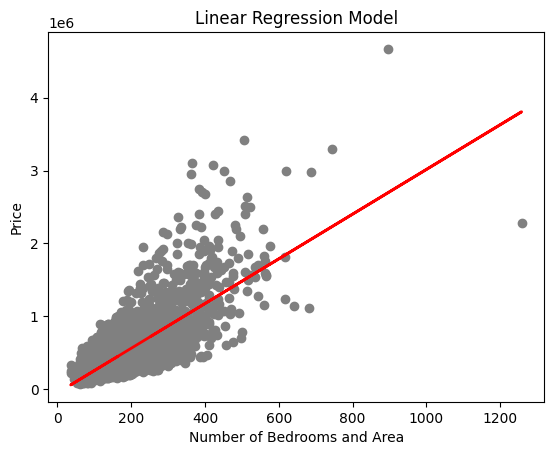

In [ ]:
# Шаг 4
import matplotlib.pyplot as plt

# Визуализация реальных значений и линии регрессии
plt.scatter(X_test, y_test, color='gray')  # реальные значения
plt.plot(X_test, y_pred, color='red', linewidth=2)  # линия регрессии
plt.title('Linear Regression Model')
plt.xlabel('Number of Bedrooms and Area')
plt.ylabel('Price')
plt.show()

# Вывод
# По значениям MSE и R-squared можно сделать вывод о точности работы модели.
# Чем ближе значение MSE к нулю, тем лучше. Чем ближе значение R-squared к 1, тем лучше.
# Также визуально можно оценить, насколько хорошо линия регрессии соответствует реальным значениям.
# На основе этих данных можно сделать вывод о точности и эффективности модели линейной регрессии для прогнозирования цен на недвижимость на основе количества спален и площади.